In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import json
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
annotation_data = {
    "이미지 정보": {
        "이미지 식별자": 112,
        "이미지 높이": 800,
        "이미지 파일명": "Amaker_006_01.jpg",
        "이미지 너비": 800
    },
    "데이터셋 정보": {
        "파일 생성일자": "2020-08-03 01:52:50",
        "데이터셋 상세설명": {
            "렉트좌표": {
                "아우터": [{}],
                "하의": [{}],
                "원피스": [{}],
                "상의": [{"X좌표": 184.5, "Y좌표": 25.5, "가로": 499, "세로": 632}]
            },
            "폴리곤좌표": {
                "아우터": [{}],
                "하의": [{}],
                "원피스": [{}],
                "상의": [
                    {"Y좌표48": 35.0, "Y좌표47": 44.0, "Y좌표44": 234.0, "Y좌표43": 210.0, "Y좌표46": 97.0, "Y좌표45": 147.0, "Y좌표40": 128.0, "Y좌표42": 180.0, "Y좌표41": 153.0, "X좌표39": 478.0, "X좌표38": 484.0, "X좌표37": 492.0, "X좌표36": 502.0, "X좌표35": 520.0, "X좌표34": 566.0, "X좌표33": 626.0, "X좌표32": 650.0, "X좌표31": 667.0, "X좌표30": 682.0, "Y좌표37": 59.0, "Y좌표36": 26.0, "X좌표8": 206.0, "Y좌표39": 109.0, "X좌표9": 199.0, "Y좌표38": 91.0, "Y좌표33": 99.0, "Y좌표32": 154.0, "Y좌표35": 39.0, "Y좌표34": 62.0, "Y좌표31": 416.0, "Y좌표30": 608.0, "X좌표48": 385.0, "X좌표47": 401.0, "X좌표46": 399.0, "X좌표45": 409.0, "X좌표44": 458.0, "X좌표2": 330.0, "X좌표43": 464.0, "X좌표3": 304.0, "X좌표42": 454.0, "X좌표41": 461.0, "X좌표1": 376.0, "X좌표40": 478.0, "X좌표6": 238.0, "X좌표7": 229.0, "X좌표4": 269.0, "X좌표5": 244.0, "Y좌표26": 611.0, "Y좌표25": 582.0, "Y좌표28": 628.0, "Y좌표9": 324.0, "Y좌표27": 626.0, "Y좌표22": 556.0, "Y좌표21": 552.0, "Y좌표24": 564.0, "Y좌표23": 570.0, "Y좌표20": 612.0, "X좌표19": 286.0, "X좌표18": 278.0, "X좌표17": 279.0, "X좌표16": 272.0, "X좌표15": 238.0, "X좌표14": 202.0, "X좌표13": 229.0, "X좌표12": 213.0, "X좌표11": 199.0, "Y좌표4": 106.0, "X좌표10": 185.0, "Y좌표3": 81.0, "Y좌표2": 59.0, "Y좌표1": 35.0, "Y좌표8": 288.0, "Y좌표7": 230.0, "Y좌표29": 614.0, "Y좌표6": 184.0, "Y좌표5": 139.0, "Y좌표15": 541.0, "Y좌표14": 514.0, "Y좌표17": 605.0, "Y좌표16": 559.0, "Y좌표11": 414.0, "Y좌표10": 354.0, "Y좌표13": 482.0, "Y좌표12": 457.0, "X좌표29": 684.0, "X좌표28": 660.0, "X좌표27": 622.0, "X좌표26": 617.0, "X좌표25": 611.0, "X좌표24": 586.0, "X좌표23": 542.0, "X좌표22": 484.0, "X좌표21": 436.0, "X좌표20": 325.0, "Y좌표19": 658.0, "Y좌표18": 644.0}
                ]
            }
        }
    },
    "라벨링": {
        "스타일": [
            {"스타일": "젠더리스", "서브스타일": "스트리트"}
        ],
        "상의": [
            {
                "색상": "블랙",
                "서브색상": "그린",
                "카테고리": "셔츠",
                "옷깃": "셔츠칼라",
                "디테일": ["포켓", "단추"],
                "소매기장": "긴팔",
                "소재": ["우븐"],
                "프린트": ["깅엄"],
                "핏": "루즈"
            }
        ]
    },
    "파일 번호": 112,
    "파일 이름": "Amaker_006_01.jpg"
}

In [3]:
# 경로 설정
json_directory = '/content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json'  # JSON 파일들이 있는 디렉토리 경로
image_directory = '/content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/crop_image'  # 이미지 파일들이 있는 디렉토리 경로

# 경로 존재 여부 확인
if not os.path.exists(json_directory):
    print(f"JSON 디렉토리가 존재하지 않습니다: {json_directory}")
else:
    print(f"JSON 디렉토리 확인: {json_directory}")

if not os.path.exists(image_directory):
    print(f"이미지 디렉토리가 존재하지 않습니다: {image_directory}")
else:
    print(f"이미지 디렉토리 확인: {image_directory}")

JSON 디렉토리 확인: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json
이미지 디렉토리 확인: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/crop_image


In [ ]:
# 샘플 파일 출력
sample_file = os.path.join(json_directory, os.listdir(json_directory)[0])
with open(sample_file, 'r', encoding='utf-8') as file:
    sample_data = json.load(file)
    print(json.dumps(sample_data, indent=4, ensure_ascii=False))

{
    "이미지 정보": {
        "이미지 식별자": 103361,
        "이미지 높이": 800,
        "이미지 파일명": "batch_GATE_113_03.jpg",
        "이미지 너비": 800
    },
    "데이터셋 정보": {
        "파일 생성일자": "2020-08-10 08:52:58",
        "데이터셋 상세설명": {
            "렉트좌표": {
                "아우터": [
                    {}
                ],
                "하의": [
                    {
                        "X좌표": 295.5,
                        "Y좌표": 200.5,
                        "가로": 165,
                        "세로": 313
                    }
                ],
                "원피스": [
                    {}
                ],
                "상의": [
                    {
                        "X좌표": 263.5,
                        "Y좌표": 8.5,
                        "가로": 233,
                        "세로": 339
                    }
                ]
            },
            "폴리곤좌표": {
                "아우터": [
                    {}
                ],
                "하의": [
                    {
         

### 모델에 입력할 데이터 구성

In [4]:
data = []
def process_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        annotation_data = json.load(file)

        image_info = annotation_data["이미지 정보"]
        label_info = annotation_data["데이터셋 정보"]["데이터셋 상세설명"]["라벨링"]

        # '색상' 키 유효성 검사
        if "색상" not in label_info["상의"][0]:
            print(f"파일에 '색상' 키가 없습니다: {file_path}. 해당 항목을 건너뜁니다.")
            return

         # '색상' 키 유효성 검사
        if "카테고리" not in label_info["상의"][0]:
            print(f"파일에 '카테고리' 키가 없습니다: {file_path}. 해당 항목을 건너뜁니다.")
            return


        file_path = os.path.join(image_directory, '%d.jpg' % image_info['이미지 식별자'])
        style = label_info["상의"][0]["카테고리"]
        color = label_info["상의"][0]['색상']
        print(color)



        data.append({
            "파일경로": file_path,
            "style": style,
            "color": color,
        })

for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        process_json_file(os.path.join(json_directory, filename))

df = pd.DataFrame(data)

# 라벨 인코딩
label_encoder_style = LabelEncoder()
label_encoder_color = LabelEncoder()

df['style'] = label_encoder_style.fit_transform(df['style'])
df['color'] = label_encoder_color.fit_transform(df['color'])

train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)


스카이블루
옐로우
핑크
옐로우
파일에 '카테고리' 키가 없습니다: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json/105337.json. 해당 항목을 건너뜁니다.
브라운
핑크
그린
핑크
핑크
블랙
파일에 '카테고리' 키가 없습니다: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json/105332.json. 해당 항목을 건너뜁니다.
화이트
화이트
베이지
민트
화이트
스카이블루
실버
라벤더
화이트
스카이블루
베이지
스카이블루
화이트
핑크
화이트
베이지
핑크
화이트
화이트
핑크
화이트
핑크
화이트
핑크
화이트
핑크
화이트
핑크
핑크
핑크
라벤더
스카이블루
핑크
화이트
핑크
스카이블루
민트
핑크
화이트
핑크
화이트
화이트
블루
스카이블루
블루
파일에 '색상' 키가 없습니다: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json/1105.json. 해당 항목을 건너뜁니다.
스카이블루
스카이블루
화이트
화이트
스카이블루
핑크
핑크
스카이블루
베이지
핑크
화이트
블랙
핑크
레드
블랙
카키
라벤더
화이트
그린
와인
화이트
화이트
핑크
화이트
옐로우
스카이블루
화이트
화이트
스카이블루
베이지
핑크
화이트
스카이블루
베이지
카키
화이트
옐로우
핑크
핑크
화이트
베이지
스카이블루
블랙
스카이블루
스카이블루
화이트
화이트
화이트
베이지
퍼플
민트
화이트
화이트
블랙
그린
베이지
스카이블루
화이트
베이지
핑크
핑크
블루
화이트
골드
화이트
네이비
화이트
화이트
블랙
화이트
화이트
파일에 '카테고리' 키가 없습니다: /content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/json/1229156.json. 해당 항목을 건너뜁니다.
핑크
옐로우
화이트
화이트
핑크
라벤더
베이지
블랙
화이트
베이지
화이트
옐로우
라벤더
블랙
민트
카키
라벤더
베이

In [ ]:
df['style'].value_counts(),df['color'].value_counts()

(style
 1    253
 4     45
 0     36
 3     32
 2     13
 Name: count, dtype: int64,
 color
 20    128
 19     68
 8      42
 12     40
 10     18
 14     11
 5      11
 7      10
 9       8
 4       6
 17      6
 0       5
 15      5
 2       4
 11      4
 6       4
 18      3
 16      3
 13      1
 3       1
 1       1
 Name: count, dtype: int64)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 16

training_set = train_datagen.flow_from_dataframe(train_df,
                                                 target_size = (400, 400),
                                                 x_col='파일경로',
                                                 y_col=['style','color'],
                                                 batch_size = batch_size,
                                                 class_mode = 'multi_output')

test_set = test_datagen.flow_from_dataframe(test_df,
                                            target_size = (400, 400),
                                            x_col='파일경로',
                                            y_col=['style','color'],
                                            batch_size = batch_size,
                                            class_mode = 'multi_output')

Found 303 validated image filenames.
Found 76 validated image filenames.


### 마지막 출력 레이어에서 줄기가 나눠짐(VGG)

In [8]:
vgg_model = VGG16(weights='imagenet', input_shape=(400,400,3), include_top=False)

# vgg_model의 weigth freezing
for layer in vgg_model.layers[:]:
  layer.trainable = False

# vgg_model + add.layer

x = vgg_model.get_layer('block5_pool').output
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x) #오버피팅을 방지하고자 드롭아웃 추가
x = Dense(units=512, activation='relu')(x)
x = BatchNormalization()(x) #학습을 더 잘하기 위해서 배치노말라이제이션 추가
x = Dense(units=256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(5, activation='softmax')(x)

style_prediction = layers.Dense(5, activation='softmax', name='style')(x)
color_prediction = layers.Dense(21, activation='softmax', name='color')(x)

model = Model(vgg_model.input,[style_prediction, color_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','color':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history=model.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set,
                         )

# model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/fit_multiout_model.h5')

<ipython-input-8-1e84b8c9186b>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_set,


Epoch 1/10
19/19 [==============================] - 20s 797ms/step - loss: 4.5457 - style_loss: 1.5533 - color_loss: 2.9924 - style_accuracy: 0.3663 - color_accuracy: 0.0957 - val_loss: 4.7502 - val_style_loss: 1.8464 - val_color_loss: 2.9038 - val_style_accuracy: 0.0921 - val_color_accuracy: 0.1053
Epoch 2/10
19/19 [==============================] - 15s 743ms/step - loss: 4.3357 - style_loss: 1.3686 - color_loss: 2.9671 - style_accuracy: 0.5380 - color_accuracy: 0.1353 - val_loss: 4.7359 - val_style_loss: 1.8696 - val_color_loss: 2.8662 - val_style_accuracy: 0.0658 - val_color_accuracy: 0.2105
Epoch 3/10
19/19 [==============================] - 15s 768ms/step - loss: 4.2195 - style_loss: 1.2784 - color_loss: 2.9411 - style_accuracy: 0.6238 - color_accuracy: 0.1749 - val_loss: 4.2976 - val_style_loss: 1.3390 - val_color_loss: 2.9586 - val_style_accuracy: 0.5395 - val_color_accuracy: 0.2632
Epoch 4/10
19/19 [==============================] - 16s 830ms/step - loss: 4.1153 - style_loss: 1

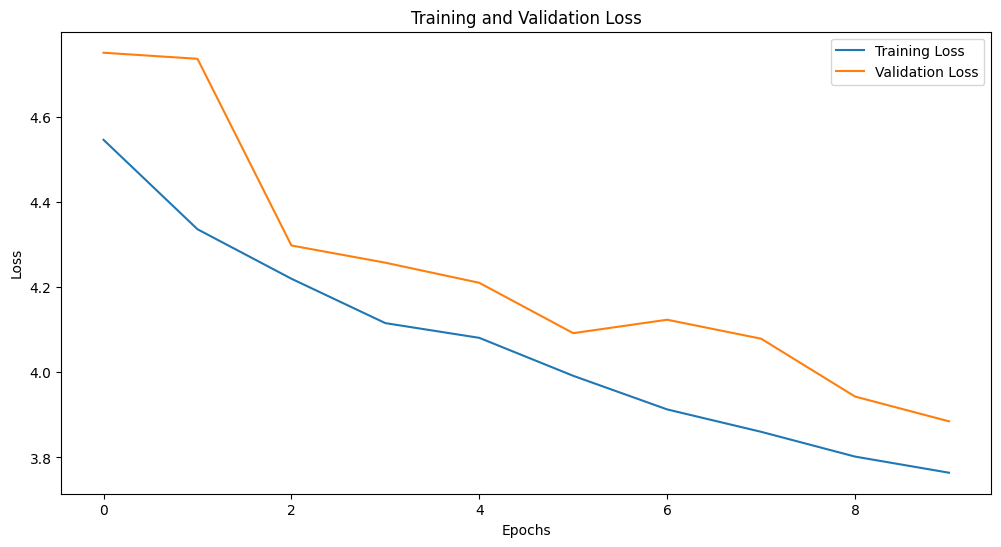

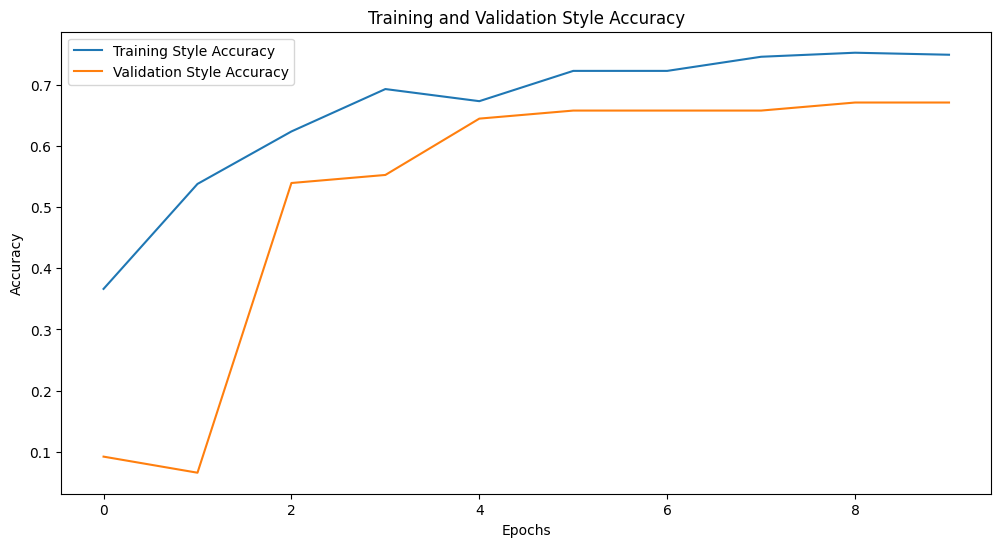

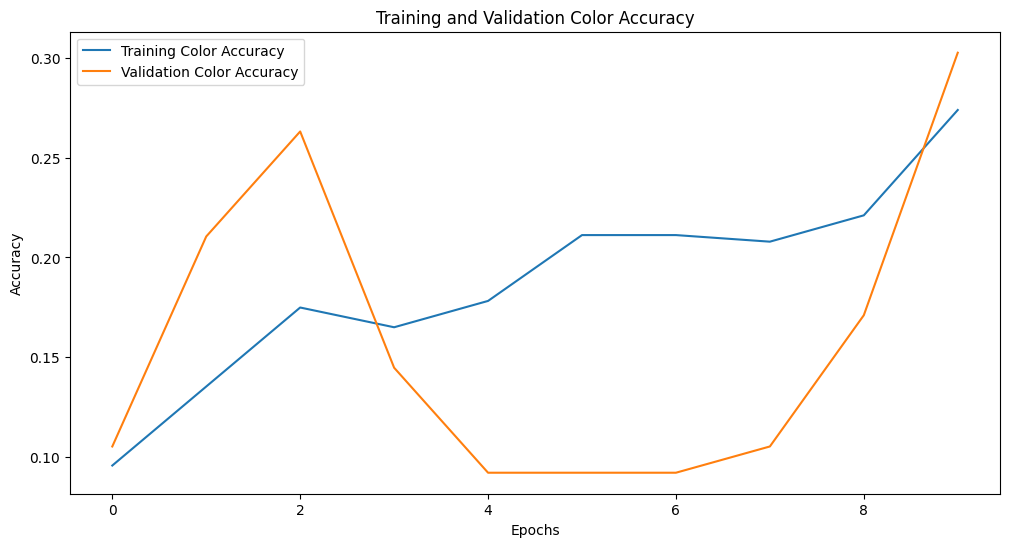

In [9]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실을 시각화하는 함수
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 학습 과정에서의 스타일 예측 정확도를 시각화하는 함수
def plot_style_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['style_accuracy'], label='Training Style Accuracy')
    plt.plot(history.history['val_style_accuracy'], label='Validation Style Accuracy')
    plt.title('Training and Validation Style Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 학습 과정에서의 색상 예측 정확도를 시각화하는 함수
def plot_color_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['color_accuracy'], label='Training Color Accuracy')
    plt.plot(history.history['val_color_accuracy'], label='Validation Color Accuracy')
    plt.title('Training and Validation Color Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 손실 시각화
plot_loss(history)

# 스타일 예측 정확도 시각화
plot_style_accuracy(history)

# 색상 예측 정확도 시각화
plot_color_accuracy(history)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 400, 400, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 400, 400, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)         0         ['block1_conv2[0][0]']        
                                                                                              

### dense부터 줄기가 나눠짐(VGG)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


vgg_model = VGG16(weights='imagenet', input_shape=(400,400,3), include_top=False)

# vgg_model의 weigth freezing
for layer in vgg_model.layers[:]:
  layer.trainable = False

# vgg_model + add.layer
x = vgg_model.get_layer('block5_pool').output

x = layers.Flatten(name='new_flatten')(x)
branch_a=layers.Dense(units=256)(x)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Activation('relu')(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)
branch_a=layers.Dense(units=128)(branch_a)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)


branch_b=layers.Dense(units=256)(x)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Activation('relu')(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)
branch_b=layers.Dense(units=128)(branch_b)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)


style_prediction = layers.Dense(5, activation='softmax', name='style')(branch_a)
color_prediction = layers.Dense(21, activation='softmax', name='color')(branch_b)

model = Model(vgg_model.input,[style_prediction, color_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','color':'sparse_categorical_crossentropy'}, metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    verbose=1
)


history1=model.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set,
                         callbacks=[checkpoint_callback, early_stopping_callback]
                        )

# model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/feature_extraction_vgg.h5')

<ipython-input-19-138296923ddc>:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(training_set,


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 7.1370 - style_loss: 2.7434 - color_loss: 4.3936 - style_accuracy: 0.2574 - color_accuracy: 0.0726
Epoch 1: val_loss improved from inf to 10.51083, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 25s 1s/step - loss: 7.1370 - style_loss: 2.7434 - color_loss: 4.3936 - style_accuracy: 0.2574 - color_accuracy: 0.0726 - val_loss: 10.5108 - val_style_loss: 3.6651 - val_color_loss: 6.8458 - val_style_accuracy: 0.3816 - val_color_accuracy: 0.0395
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 5.3290 - style_loss: 1.9435 - color_loss: 3.3855 - style_accuracy: 0.3696 - color_accuracy: 0.1485
Epoch 2: val_loss improved from 10.51083 to 6.91675, saving model to best_model.h5
19/19 [==============================] - 21s 1s/step - loss: 5.3290 - style_loss: 1.9435 - color_loss: 3.3855 - style_accuracy: 0.3696 - color_accuracy: 0.1485 - val_loss: 6.9168 - val_style_loss: 2.1466 - val_color_loss: 4.7701 - val_style_accuracy: 0.5526 - val_color_accuracy: 0.0789
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 4.2849 - style_loss: 1.4047 - color_loss: 2.8802 - style_accuracy: 0.5314 - color_accuracy: 0.2277
Epoch 3:

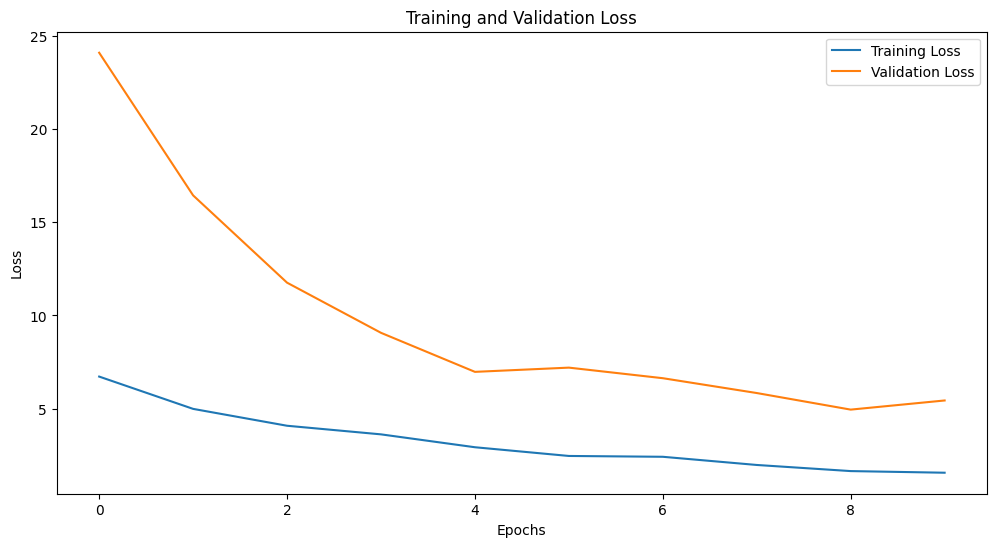

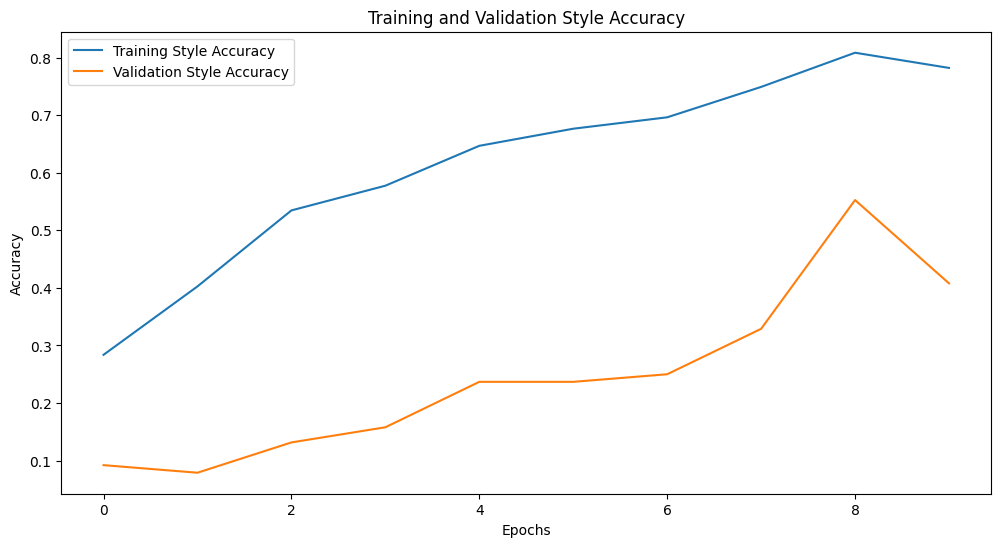

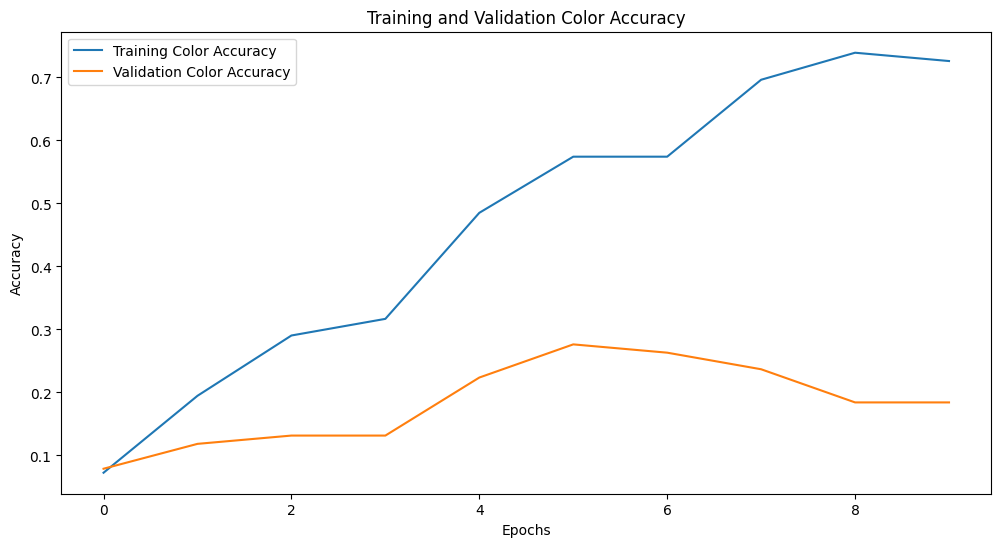

In [7]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실을 시각화하는 함수
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 학습 과정에서의 스타일 예측 정확도를 시각화하는 함수
def plot_style_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['style_accuracy'], label='Training Style Accuracy')
    plt.plot(history.history['val_style_accuracy'], label='Validation Style Accuracy')
    plt.title('Training and Validation Style Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 학습 과정에서의 색상 예측 정확도를 시각화하는 함수
def plot_color_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['color_accuracy'], label='Training Color Accuracy')
    plt.plot(history.history['val_color_accuracy'], label='Validation Color Accuracy')
    plt.title('Training and Validation Color Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 손실 시각화
plot_loss(history1)

# 스타일 예측 정확도 시각화
plot_style_accuracy(history1)

# 색상 예측 정확도 시각화
plot_color_accuracy(history1)


In [ ]:
resnet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 400, 400, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 406, 406, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 200, 200, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 200, 200, 64)         256       ['conv1_conv[0][0]']          
 on)                      

### dense에서 줄기 나눠짐(res_net)

In [14]:
resnet_model = ResNet50(weights='imagenet', input_shape=(400,400,3), include_top=False)

# resnet_model의 weigth freezing
for layer in resnet_model.layers[:]:
  layer.trainable = False

# resnet_model + add.layer
x = resnet_model.output

x = layers.Flatten(name='new_flatten')(x)
branch_a=layers.Dense(units=256)(x)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Activation('relu')(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)
branch_a=layers.Dense(units=128)(branch_a)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)


branch_b=layers.Dense(units=256)(x)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Activation('relu')(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)
branch_b=layers.Dense(units=128)(branch_b)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)


style_prediction = layers.Dense(5, activation='softmax', name='style')(branch_a)
color_prediction = layers.Dense(21, activation='softmax', name='color')(branch_b)

model = Model(resnet_model.input,[style_prediction, color_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','color':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history2=model.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set,
                        )

<ipython-input-14-817834a0ce14>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model.fit_generator(training_set,


Epoch 1/10
19/19 [==============================] - 23s 749ms/step - loss: 6.9553 - style_loss: 2.6577 - color_loss: 4.2976 - style_accuracy: 0.2277 - color_accuracy: 0.0495 - val_loss: 24.6618 - val_style_loss: 7.7611 - val_color_loss: 16.9007 - val_style_accuracy: 0.0658 - val_color_accuracy: 0.0263
Epoch 2/10
19/19 [==============================] - 15s 772ms/step - loss: 6.2330 - style_loss: 2.2706 - color_loss: 3.9625 - style_accuracy: 0.2739 - color_accuracy: 0.0858 - val_loss: 14.4457 - val_style_loss: 4.7775 - val_color_loss: 9.6682 - val_style_accuracy: 0.1184 - val_color_accuracy: 0.0263
Epoch 3/10
19/19 [==============================] - 16s 796ms/step - loss: 5.7156 - style_loss: 2.1430 - color_loss: 3.5726 - style_accuracy: 0.2541 - color_accuracy: 0.1518 - val_loss: 8.6374 - val_style_loss: 3.0354 - val_color_loss: 5.6020 - val_style_accuracy: 0.1447 - val_color_accuracy: 0.0526
Epoch 4/10
19/19 [==============================] - 15s 771ms/step - loss: 5.3301 - style_loss

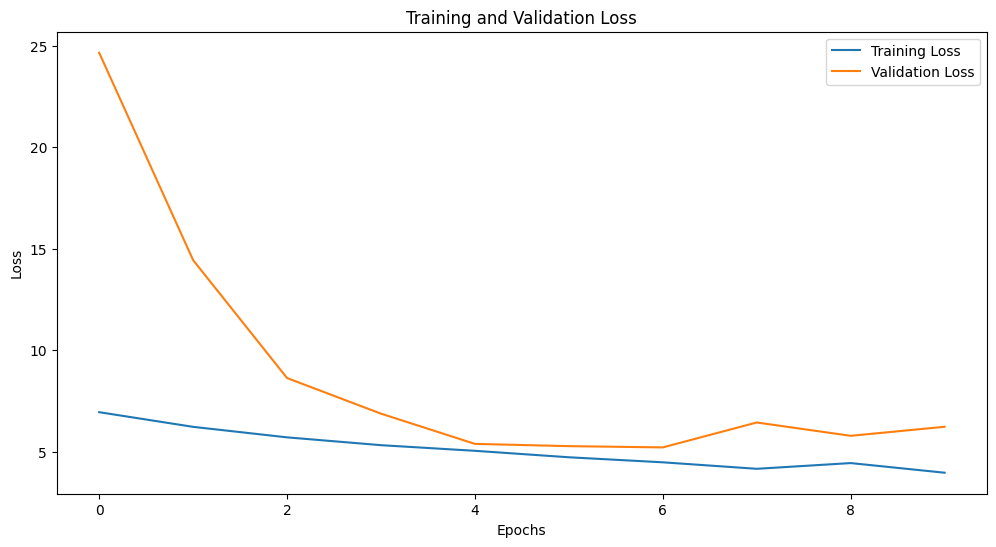

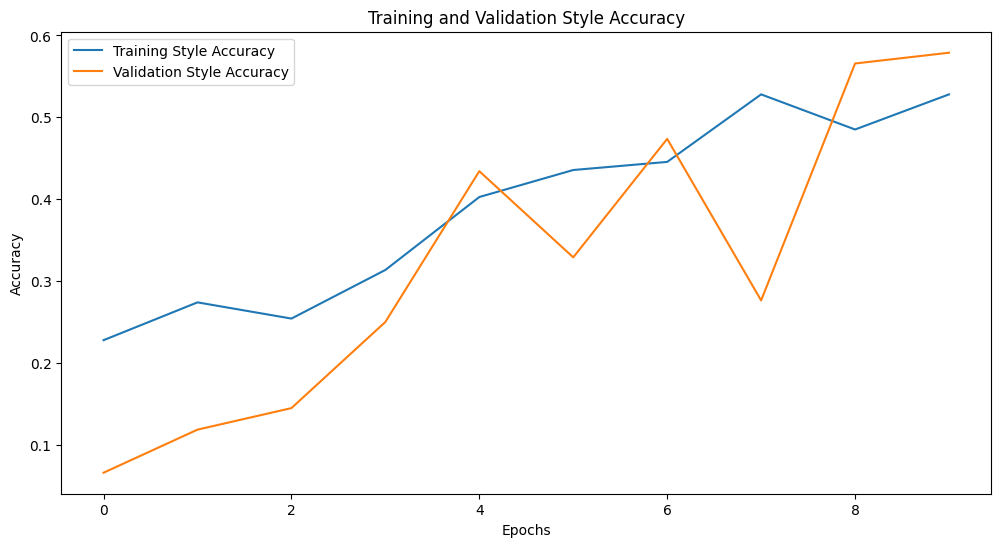

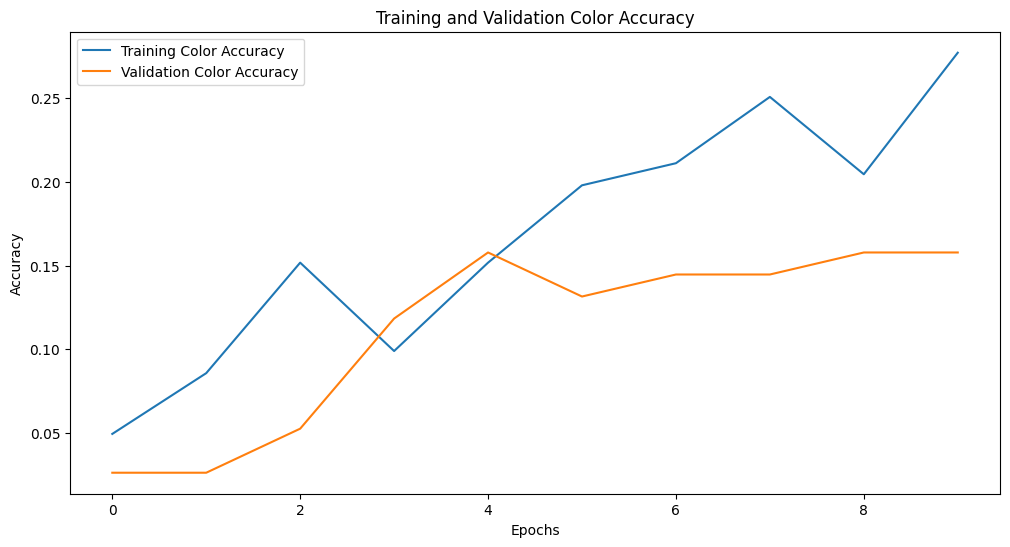

In [15]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실을 시각화하는 함수
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 학습 과정에서의 스타일 예측 정확도를 시각화하는 함수
def plot_style_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['style_accuracy'], label='Training Style Accuracy')
    plt.plot(history.history['val_style_accuracy'], label='Validation Style Accuracy')
    plt.title('Training and Validation Style Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 학습 과정에서의 색상 예측 정확도를 시각화하는 함수
def plot_color_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['color_accuracy'], label='Training Color Accuracy')
    plt.plot(history.history['val_color_accuracy'], label='Validation Color Accuracy')
    plt.title('Training and Validation Color Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 손실 시각화
plot_loss(history2)

# 스타일 예측 정확도 시각화
plot_style_accuracy(history2)

# 색상 예측 정확도 시각화
plot_color_accuracy(history2)


### 마지막 출력 레이어에서 줄기 나눠짐(res_net)

In [16]:
resnet_model = ResNet50(weights='imagenet', input_shape=(400,400,3), include_top=False)

# resnet_model의 weigth freezing
for layer in resnet_model.layers[:]:
  layer.trainable = False

# resnet_model + add.layer
x = resnet_model.output

x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x) #오버피팅을 방지하고자 드롭아웃 추가
x = Dense(units=512, activation='relu')(x)
x = BatchNormalization()(x) #학습을 더 잘하기 위해서 배치노말라이제이션 추가
x = Dense(units=256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(5, activation='softmax')(x)

style_prediction = layers.Dense(5, activation='softmax', name='style')(x)
color_prediction = layers.Dense(21, activation='softmax', name='color')(x)

model = Model(resnet_model.input,[style_prediction, color_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','color':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history3=model.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set,
                         )

# model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝/dl_project/fit_multiout_model.h5')

<ipython-input-16-11ea8ff6ddc2>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=model.fit_generator(training_set,


Epoch 1/10
19/19 [==============================] - 21s 775ms/step - loss: 4.5304 - style_loss: 1.4957 - color_loss: 3.0347 - style_accuracy: 0.4653 - color_accuracy: 0.0528 - val_loss: 5.0778 - val_style_loss: 2.0096 - val_color_loss: 3.0683 - val_style_accuracy: 0.1184 - val_color_accuracy: 0.0921
Epoch 2/10
19/19 [==============================] - 15s 771ms/step - loss: 4.3502 - style_loss: 1.3693 - color_loss: 2.9809 - style_accuracy: 0.6073 - color_accuracy: 0.0825 - val_loss: 4.3712 - val_style_loss: 1.4317 - val_color_loss: 2.9395 - val_style_accuracy: 0.5658 - val_color_accuracy: 0.1316
Epoch 3/10
19/19 [==============================] - 14s 742ms/step - loss: 4.2189 - style_loss: 1.2769 - color_loss: 2.9420 - style_accuracy: 0.6634 - color_accuracy: 0.1353 - val_loss: 4.2664 - val_style_loss: 1.3367 - val_color_loss: 2.9297 - val_style_accuracy: 0.6447 - val_color_accuracy: 0.1447
Epoch 4/10
19/19 [==============================] - 15s 767ms/step - loss: 4.1557 - style_loss: 1

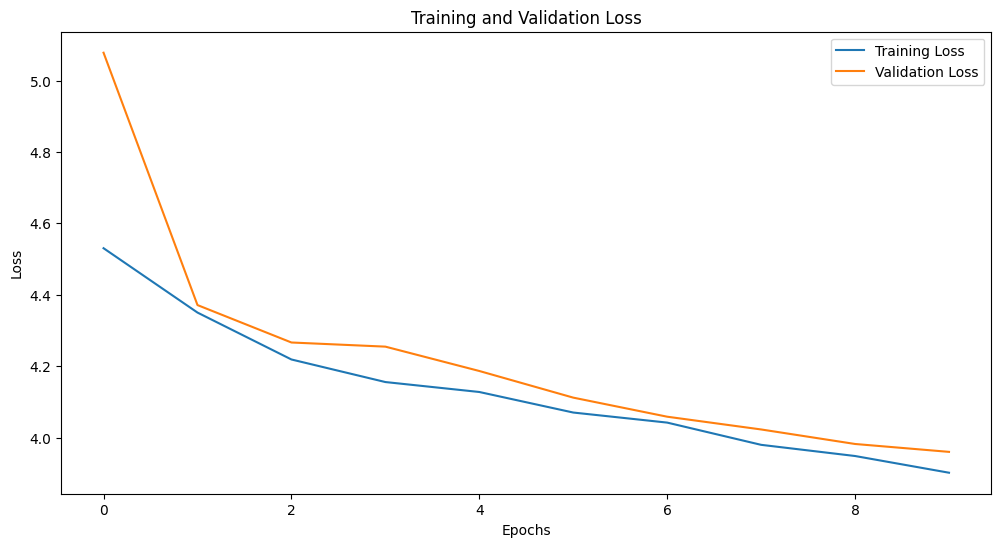

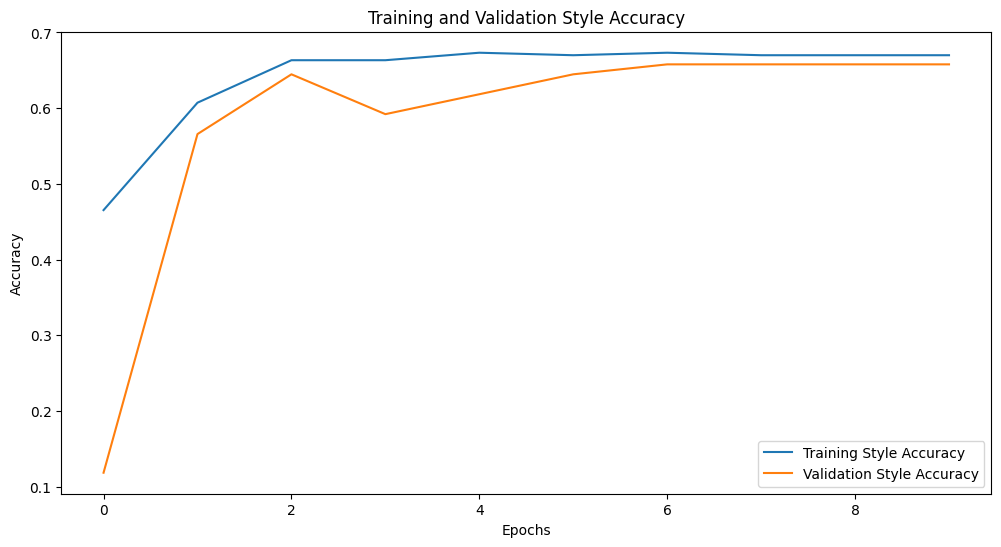

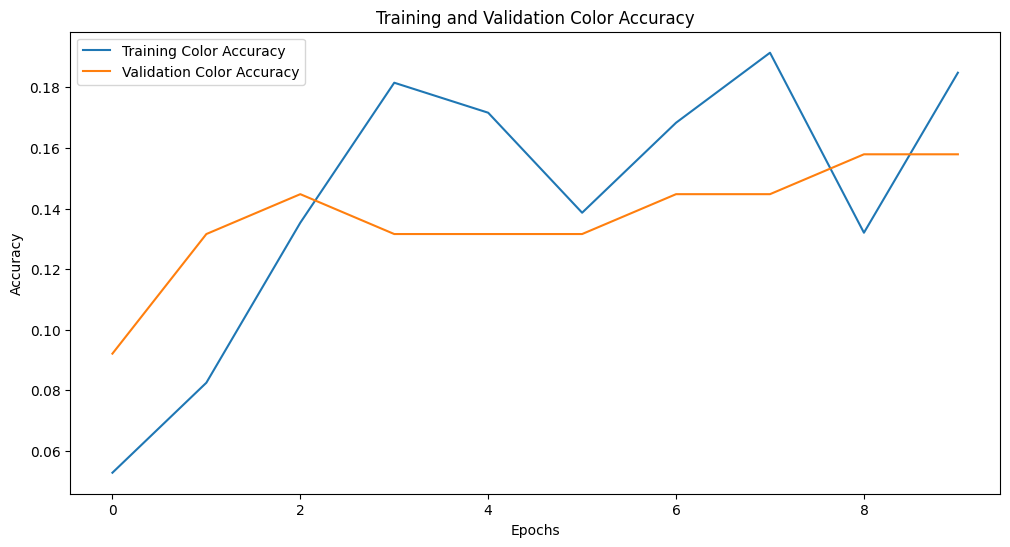

In [17]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실을 시각화하는 함수
def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 학습 과정에서의 스타일 예측 정확도를 시각화하는 함수
def plot_style_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['style_accuracy'], label='Training Style Accuracy')
    plt.plot(history.history['val_style_accuracy'], label='Validation Style Accuracy')
    plt.title('Training and Validation Style Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 학습 과정에서의 색상 예측 정확도를 시각화하는 함수
def plot_color_accuracy(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['color_accuracy'], label='Training Color Accuracy')
    plt.plot(history.history['val_color_accuracy'], label='Validation Color Accuracy')
    plt.title('Training and Validation Color Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 손실 시각화
plot_loss(history3)

# 스타일 예측 정확도 시각화
plot_style_accuracy(history3)

# 색상 예측 정확도 시각화
plot_color_accuracy(history3)


### 각 4가지 모델 validation accuracy 비교

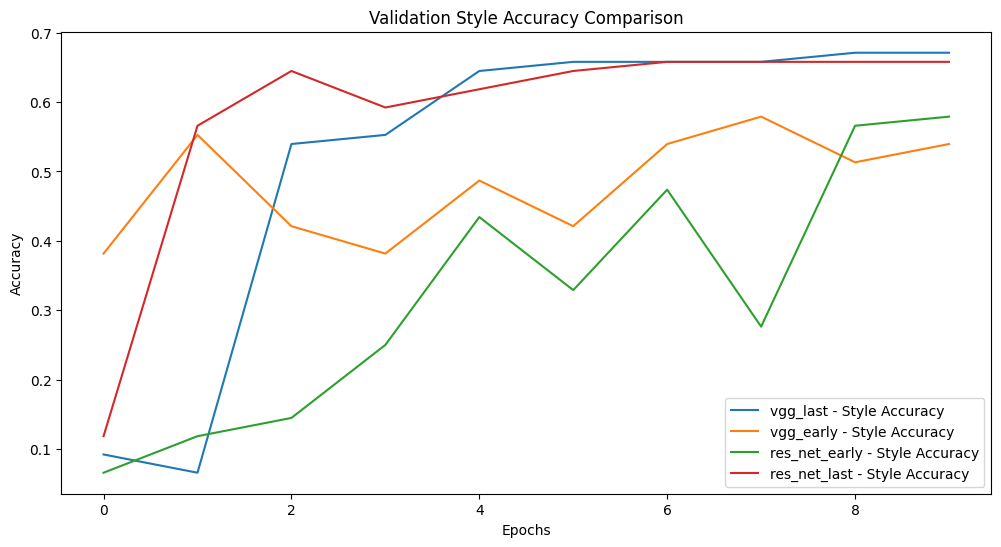

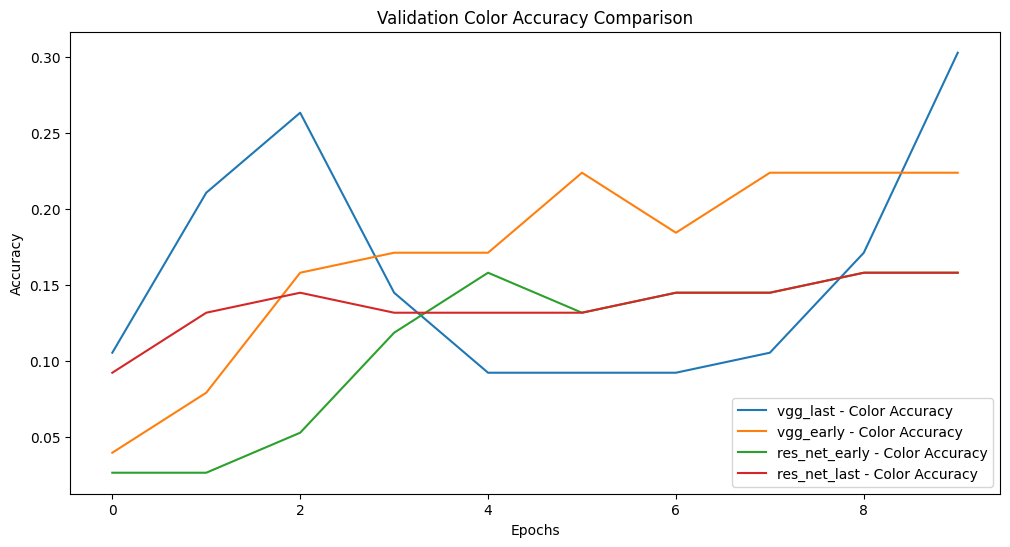

In [22]:
histories=[history, history1, history2, history3]

labels = ['vgg_last', 'vgg_early', 'res_net_early', 'res_net_last']

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_comparative_style_accuracy(histories, labels):
    plt.figure(figsize=(12, 6))

    for history, label in zip(histories, labels):
        plt.plot(history.history['val_style_accuracy'], label=f'{label} - Style Accuracy')

    plt.title('Validation Style Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_comparative_color_accuracy(histories, labels):
    plt.figure(figsize=(12, 6))

    for history, label in zip(histories, labels):
        plt.plot(history.history['val_color_accuracy'], label=f'{label} - Color Accuracy')

    plt.title('Validation Color Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Style Accuracy 시각화
plot_comparative_style_accuracy(histories, labels)

# Color Accuracy 시각화
plot_comparative_color_accuracy(histories, labels)
